In [1]:
import pandas as pd
import numpy as np

In [552]:
virus = pd.read_csv('coronavirus_dataset.csv')

In [4]:
virus.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Japan,35.67620,139.6503,2020-01-22,2,confirmed
1,NaN,South Korea,37.56650,126.9780,2020-01-22,1,confirmed
2,NaN,Thailand,13.75630,100.5018,2020-01-22,2,confirmed
3,Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,confirmed
4,Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,confirmed


In [5]:
virus.tail()

,Province.State,Country.Region,Lat,Long,date,cases,type
2156,Sichuan,Mainland China,30.61714,102.71030,2020-02-26,18,recovered
2157,Tianjin,Mainland China,39.29362,117.33300,2020-02-26,5,recovered
2158,Xinjiang,Mainland China,41.11981,85.17822,2020-02-26,4,recovered
2159,Yunnan,Mainland China,24.97411,101.48680,2020-02-26,15,recovered
2160,Zhejiang,Mainland China,29.18251,120.09850,2020-02-26,59,recovered


In [18]:
virus.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,2161.0,31.557767,11.130730,-37.8136,26.81536,31.82571,37.57769,61.9241
Long,2161.0,104.934524,37.655398,-123.8695,106.87480,113.54390,118.15290,153.0251
cases,2161.0,53.008329,422.999086,-20.0000,2.00000,5.00000,17.00000,14840.0000


In [20]:
virus.dtypes

Province.State     object
Country.Region     object
Lat               float64
Long              float64
date               object
cases               int64
type               object
dtype: object

In [22]:
virus.isnull().sum()

Province.State    302
Country.Region      0
Lat                 0
Long                0
date                0
cases               0
type                0
dtype: int64

In [30]:
virus[virus['Province.State'].isnull()]['Country.Region'].value_counts() # ulkesi belli olup sehri belli olmayanlar

Singapore               40
South Korea             39
Japan                   35
Thailand                23
Italy                   18
Malaysia                16
Iran                    16
Germany                 15
France                  14
Vietnam                 13
United Arab Emirates     9
UK                       7
Philippines              5
Spain                    5
India                    4
Kuwait                   3
Bahrain                  3
Finland                  3
Oman                     2
Sweden                   2
Russia                   2
Iraq                     2
Israel                   2
Croatia                  2
Lebanon                  2
Cambodia                 2
Belgium                  2
Nepal                    2
Sri Lanka                2
Georgia                  1
Pakistan                 1
Romania                  1
Austria                  1
Afghanistan              1
Norway                   1
Switzerland              1
Brazil                   1
N

# DATA_CLEANING (VERI TEMIZLEME)

## Outlier Analysis (Aykiri Gozlem Analizi)

In [ ]:
# surekli degiskenler 'case' 'lat' ve 'long', lat ve long enlem boylam oldugundan onlar icin birsey yapmaya gerek yok, case degiskenini ise incelerse

In [162]:
virus.cases.describe()

count     2161.000000
mean        53.008329
std        422.999086
min        -20.000000
25%          2.000000
50%          5.000000
75%         17.000000
max      14840.000000
Name: cases, dtype: float64

In [ ]:
# ilk dikkatimi ceken nokta minumum degerin -20 olmasi, vaka sayisi nasil eksi olabiliyor???? 
# ortalama ile std arasinda cok fark var ama bu normal cunku bazi yerlerde vaka sayisi cok fazla ama dunya genelinde daha yeni yayildigi icin az

In [553]:
virus.loc[virus.cases < 1, 'cases'] = virus.loc[virus.cases < 1, 'cases'] * -1

In [554]:
virus[virus.cases < 1]

,Province.State,Country.Region,Lat,Long,date,cases,type


In [555]:
virus.cases.describe() # tekra bakinca, goruldugu ortalama 53 ama dagilim simetrik degil, genel olarak vaka sayisi az ki bunu biliyoruz

count     2161.000000
mean        53.061083
std        422.992469
min          1.000000
25%          2.000000
50%          5.000000
75%         17.000000
max      14840.000000
Name: cases, dtype: float64

#### tek degiskenli aykiri gozlem analizinde sektor bilgisini goz onunde tutmak sartiyla en cok kullanilan boxplot

In [106]:
import seaborn as sns

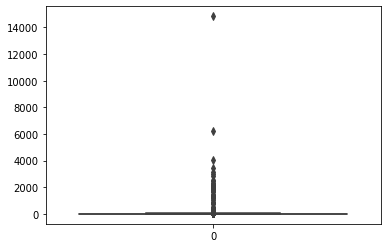

In [110]:
sns.boxplot(data = virus.cases);

In [118]:
Q1 = virus.cases.quantile(0.25)
Q3 = virus.cases.quantile(0.75)
IQR= Q3-Q1

In [112]:
Q1

2.0

In [113]:
Q3

17.0

In [114]:
IQR

15.0

In [115]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [116]:
alt_sinir

-20.5

In [117]:
ust_sinir

39.5

In [119]:
virus[(virus.cases < alt_sinir) | (virus.cases > ust_sinir)] # bunlara aykiri gozlem diyemeyiz, bu degerlerin hepsi normal
# aykiri gozlem coksa onlar aykiri degil normaldir

,Province.State,Country.Region,Lat,Long,date,cases,type
13,Hubei,Mainland China,30.97564,112.2707,2020-01-22,444,confirmed
77,Hubei,Mainland China,30.97564,112.2707,2020-01-24,105,confirmed
115,Hubei,Mainland China,30.97564,112.2707,2020-01-25,212,confirmed
152,Henan,Mainland China,33.88202,113.6140,2020-01-26,51,confirmed
154,Hubei,Mainland China,30.97564,112.2707,2020-01-26,297,confirmed
176,Zhejiang,Mainland China,29.18251,120.0985,2020-01-26,42,confirmed
193,Guangdong,Mainland China,23.33841,113.4220,2020-01-27,40,confirmed
199,Henan,Mainland China,33.88202,113.6140,2020-01-27,45,confirmed
200,Hubei,Mainland China,30.97564,112.2707,2020-01-27,365,confirmed
239,Guangdong,Mainland China,23.33841,113.4220,2020-01-28,56,confirmed


## Missing Data Analysis (Eksik Veri Analizi)

In [ ]:
# eksiklik rastegele mi olustu yoksa yapisal bir sorun mu var? bunu anlamamiz lazim

In [172]:
virus.isnull().sum()

Province.State    302
Country.Region      0
Lat                 0
Long                0
date                0
cases               0
type                0
dtype: int64

In [173]:
virus.notnull().sum()

Province.State    1859
Country.Region    2161
Lat               2161
Long              2161
date              2161
cases             2161
type              2161
dtype: int64

In [174]:
virus.isnull()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [327]:
missing_data = virus[virus.isnull().any(axis=1)] # en az bir tane eksik degeri olan
missing_data.shape

(302, 7)

In [ ]:
# eksik degerlerin direk silinmesi burada mantikli degil, burada sehir isimlerini kendimiz doldurabiliriz

In [ ]:
# virus.Province.State() ile doldurma yapacagiz ama oncesinde ne ile dolduracagimiza karar vermemiz lazim

In [328]:
df1 = missing_data['Country.Region'].value_counts() # 41 tane ulkenin missing datasi var
df1

Singapore               40
South Korea             39
Japan                   35
Thailand                23
Italy                   18
Malaysia                16
Iran                    16
Germany                 15
France                  14
Vietnam                 13
United Arab Emirates     9
UK                       7
Philippines              5
Spain                    5
India                    4
Kuwait                   3
Bahrain                  3
Finland                  3
Oman                     2
Sweden                   2
Russia                   2
Iraq                     2
Israel                   2
Croatia                  2
Lebanon                  2
Cambodia                 2
Belgium                  2
Nepal                    2
Sri Lanka                2
Georgia                  1
Pakistan                 1
Romania                  1
Austria                  1
Afghanistan              1
Norway                   1
Switzerland              1
Brazil                   1
N

In [329]:
df2 = virus['Country.Region'].value_counts() # toplamda 49 ulke var
df2

Mainland China          1700
Singapore                 40
Hong Kong                 39
South Korea               39
Japan                     35
US                        29
Taiwan                    24
Thailand                  23
Australia                 23
Others                    19
Italy                     18
Malaysia                  16
Iran                      16
Germany                   15
France                    14
Macau                     13
Vietnam                   13
Canada                    12
United Arab Emirates       9
UK                         7
Spain                      5
Philippines                5
India                      4
Kuwait                     3
Bahrain                    3
Finland                    3
Sri Lanka                  2
Russia                     2
Iraq                       2
Oman                       2
Croatia                    2
Israel                     2
Lebanon                    2
Cambodia                   2
Sweden        

In [317]:
nan_countries = pd.concat([df1,df2],axis=1, join='inner')
nan_countries 

,Country.Region,Country.Region
Singapore,40,40
South Korea,39,39
Japan,35,35
Thailand,23,23
Italy,18,18
Malaysia,16,16
Iran,16,16
Germany,15,15
France,14,14
Vietnam,13,13


In [318]:
liste = list(nan_countries.index)

In [291]:
liste # bu ulkelerin butun Country.Region degerleri NaN 
# aslinda sadece 8 ulkenin degerleri var, digerlerinin bilgileri maalesef yok

['Singapore',
 'South Korea',
 'Japan',
 'Thailand',
 'Italy',
 'Malaysia',
 'Iran',
 'Germany',
 'France',
 'Vietnam',
 'United Arab Emirates',
 'UK',
 'Philippines',
 'Spain',
 'India',
 'Kuwait',
 'Bahrain',
 'Finland',
 'Oman',
 'Sweden',
 'Russia',
 'Iraq',
 'Israel',
 'Croatia',
 'Lebanon',
 'Cambodia',
 'Belgium',
 'Nepal',
 'Sri Lanka',
 'Georgia',
 'Pakistan',
 'Romania',
 'Austria',
 'Afghanistan',
 'Norway',
 'Switzerland',
 'Brazil',
 'North Macedonia',
 'Egypt',
 'Algeria',
 'Greece']

In [320]:
full_countries = pd.concat([df1,df2],axis=1, join='outer', sort=True)
full_countries

,Country.Region,Country.Region
Afghanistan,1.0,1
Algeria,1.0,1
Australia,NaN,23
Austria,1.0,1
Bahrain,3.0,3
Belgium,2.0,2
Brazil,1.0,1
Cambodia,2.0,2
Canada,NaN,12
Croatia,2.0,2


In [325]:
full_countries[full_countries.isnull().any(axis=1)] # bunlar da bos degeri olmayan ulkeler

,Country.Region,Country.Region
Australia,NaN,23
Canada,NaN,12
Hong Kong,NaN,39
Macau,NaN,13
Mainland China,NaN,1700
Others,NaN,19
Taiwan,NaN,24
US,NaN,29


## benim cikardigim sonuc, bos degerleri doldurabilecegimiz mantikli bir yol yok, bir ulkenin hem bos hem dolu verisi yok, ya dolu ya bos
## mesela japonyanin bos degerlerini nasil dolduracagiz, japanyodan hicbir sehir ismi yok ki, bir tane olsa onunla dolduralim deriz
## ya bu degiskeni tamamen silmek gerekecek ya da buraya bu ulkelerin baskenti falan yazilacak
## ayrica bu bos degere sahip ulkelerin enlem boylam bilgileri de hep ayni,
## sonuc olarak buralari "unknown" gibi bir ifade ile doldurmanin veriye zarar vermeyecegini, analize de olumsuz etkisinin olmayacagini dusunuyorum

In [342]:
virus.fillna("unknown", inplace=True)

In [348]:
virus.isnull().sum()

Province.State    0
Country.Region    0
Lat               0
Long              0
date              0
cases             0
type              0
dtype: int64

In [349]:
clean_virus = virus

### eksik verri yapisinin gorsellestirilmesi

In [344]:
!pip install missingno

In [351]:
import missingno as msno
virus = pd.read_csv('coronavirus_dataset.csv') # bu kismi incelemek icin veriyi tekrar yukleyelim

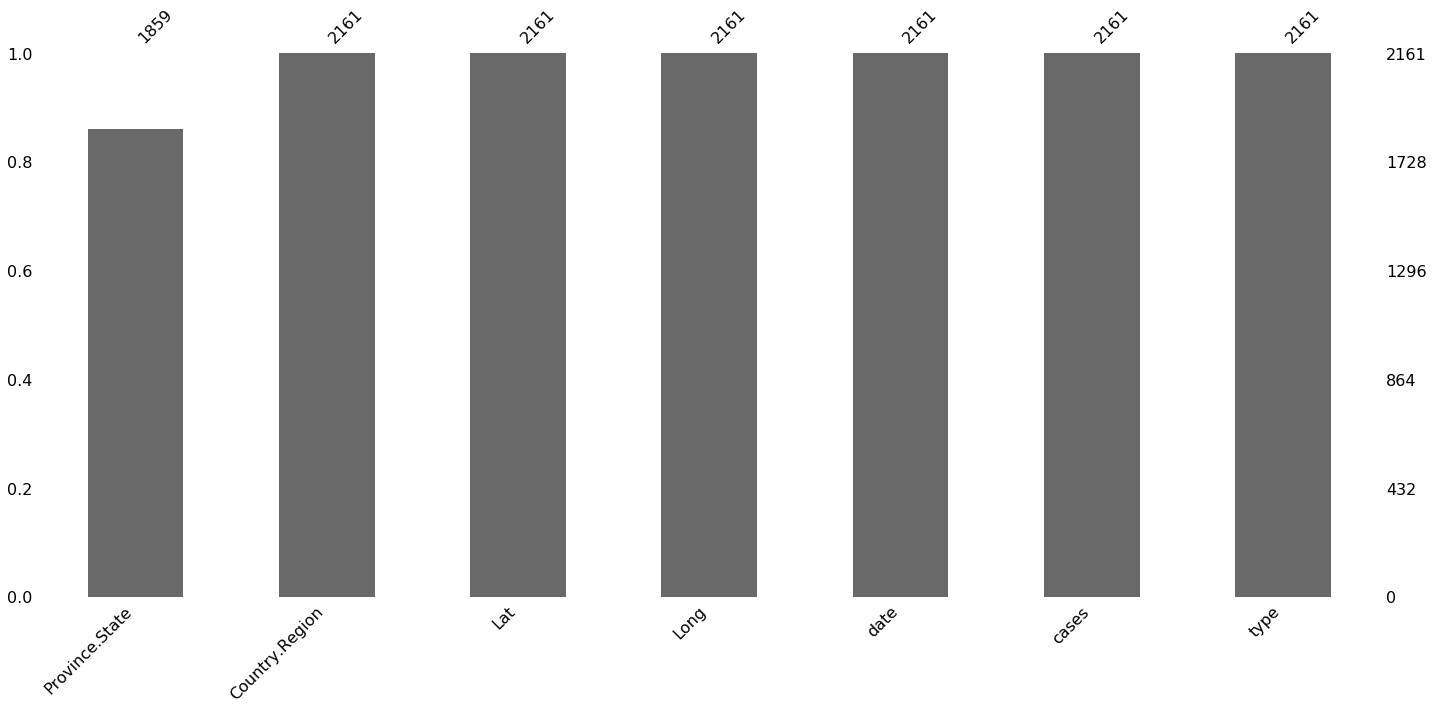

In [352]:
msno.bar(virus);

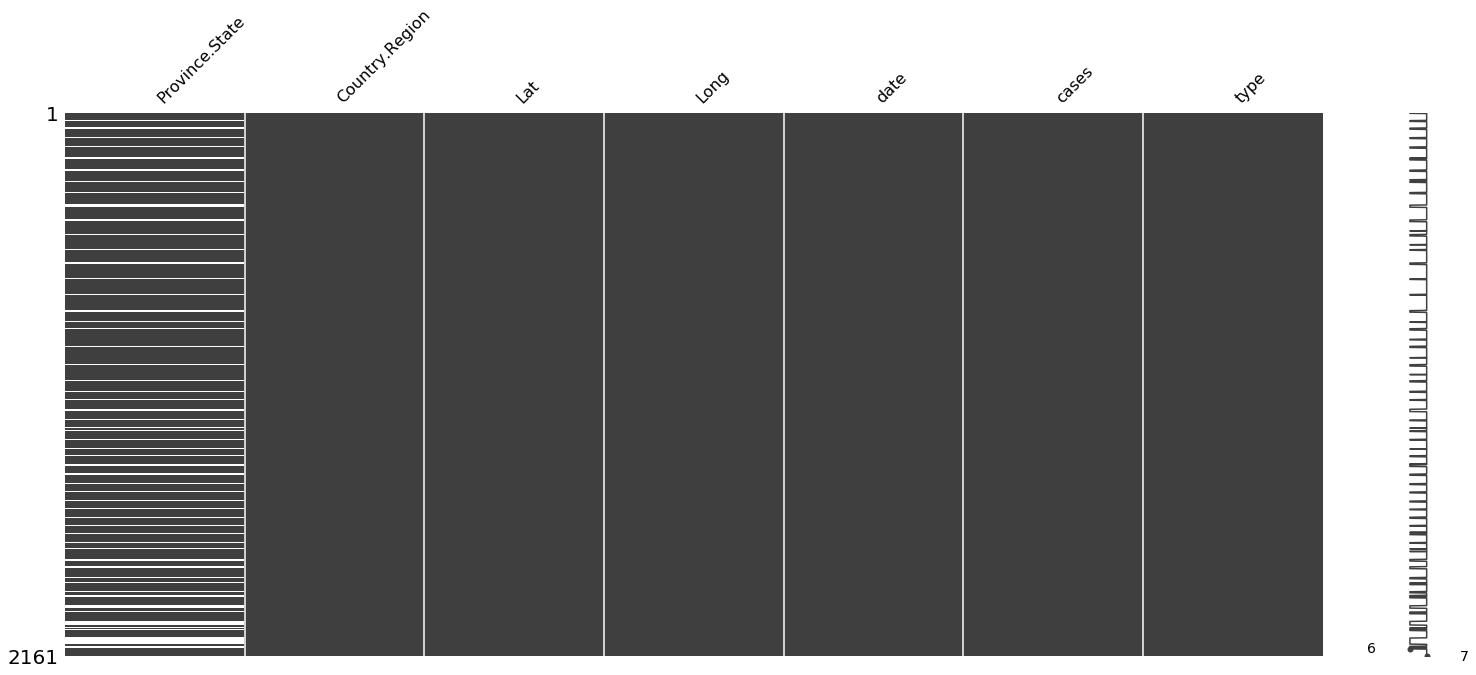

In [355]:
msno.matrix(virus);

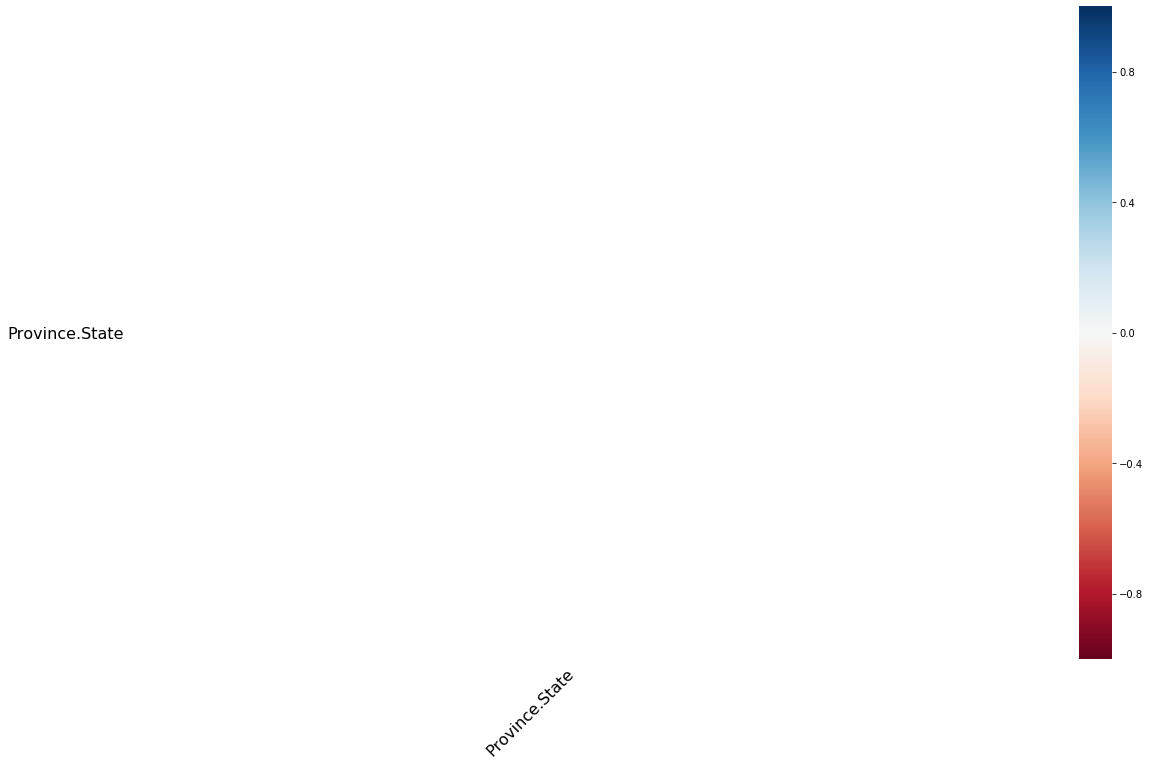

In [357]:
msno.heatmap(virus);

## donusum

In [368]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [511]:
corona_virus = pd.get_dummies(clean_virus, columns = ['type'], prefix = ['type'])

In [512]:
corona_virus.head()

,Province.State,Country.Region,Lat,Long,date,cases,type_confirmed,type_death,type_recovered
0,unknown,Japan,35.67620,139.6503,2020-01-22,2,1,0,0
1,unknown,South Korea,37.56650,126.9780,2020-01-22,1,1,0,0
2,unknown,Thailand,13.75630,100.5018,2020-01-22,2,1,0,0
3,Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,1,0,0
4,Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,1,0,0


In [513]:
corona_virus['type'] = clean_virus['type']

In [441]:
corona_virus.head()

,Province.State,Country.Region,Lat,Long,date,cases,type_confirmed,type_death,type_recovered,type
0,unknown,Japan,35.67620,139.6503,2020-01-22,2,1,0,0,confirmed
1,unknown,South Korea,37.56650,126.9780,2020-01-22,1,1,0,0,confirmed
2,unknown,Thailand,13.75630,100.5018,2020-01-22,2,1,0,0,confirmed
3,Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,1,0,0,confirmed
4,Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,1,0,0,confirmed


In [387]:
corona_virus.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province.State,2161,61,unknown,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country.Region,2161,49,Mainland China,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,2161,NaN,NaN,NaN,31.5578,11.1307,-37.8136,26.8154,31.8257,37.5777,61.9241
Long,2161,NaN,NaN,NaN,104.935,37.6554,-123.87,106.875,113.544,118.153,153.025
date,2161,36,2020-02-12,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cases,2161,NaN,NaN,NaN,53.0611,422.992,1,2,5,17,14840
type_confirmed,2161,NaN,NaN,NaN,0.547894,0.497816,0,0,1,1,1
type_death,2161,NaN,NaN,NaN,0.0689496,0.253427,0,0,0,0,1
type_recovered,2161,NaN,NaN,NaN,0.383156,0.486268,0,0,0,1,1


## veri manipulasyonu

In [401]:
corona_virus.groupby('Country.Region')[['type_confirmed','type_death','type_recovered']].mean() # ulkelere gore type larin orani

,type_confirmed,type_death,type_recovered
Country.Region,,,
Afghanistan,1.000000,0.000000,0.000000
Algeria,1.000000,0.000000,0.000000
Australia,0.782609,0.000000,0.217391
Austria,1.000000,0.000000,0.000000
Bahrain,1.000000,0.000000,0.000000
Belgium,0.500000,0.000000,0.500000
Brazil,1.000000,0.000000,0.000000
Cambodia,0.500000,0.000000,0.500000
Canada,0.833333,0.000000,0.166667


In [402]:
corona_virus.groupby('Country.Region')[['cases','type_confirmed','type_death','type_recovered']].sum() # ulkelere gore typlerin sayisi

,cases,type_confirmed,type_death,type_recovered
Country.Region,,,,
Afghanistan,1,1.0,0.0,0.0
Algeria,1,1.0,0.0,0.0
Australia,37,18.0,0.0,5.0
Austria,2,1.0,0.0,0.0
Bahrain,33,3.0,0.0,0.0
Belgium,2,1.0,0.0,1.0
Brazil,1,1.0,0.0,0.0
Cambodia,2,1.0,0.0,1.0
Canada,14,10.0,0.0,2.0


In [393]:
corona_virus.groupby('Country.Region')[['type_confirmed','type_death','type_recovered']].aggregate([np.mean, sum]) # ustteki ikisini tek df olarak

type_confirmed        type_death      type_recovered  \
                               mean    sum       mean  sum           mean   
Country.Region                                                              
Afghanistan                1.000000    1.0   0.000000    0       0.000000   
Algeria                    1.000000    1.0   0.000000    0       0.000000   
Australia                  0.782609   18.0   0.000000    0       0.217391   
Austria                    1.000000    1.0   0.000000    0       0.000000   
Bahrain                    1.000000    3.0   0.000000    0       0.000000   
Belgium                    0.500000    1.0   0.000000    0       0.500000   
Brazil                     1.000000    1.0   0.000000    0       0.000000   
Cambodia                   0.500000    1.0   0.000000    0       0.500000   
Canada                     0.833333   10.0   0.000000    0       0.166667   
Croatia                    1.000000    2.0   0.000000    0       0.000000   
Egypt                      1.000000    1.0   0.000000    0       0.000000   
Finland                    0.666667    2.0   0.000000    0       0.333333   
France                     0.642857    9.0   0.142857    2       0.214286   
Georgia                    1.000000    1.0   0.000000    0       0.000000   
Germany                    0.733333   11.0   0.000000    0       0.266667   
Greece                     1.000000    1.0   0.000000    0       0.000000   
Hong Kong                  0.717949   28.0   0.051282    2       0.230769   
India                      0.750000    3.0   0.000000    0       0.250000   
Iran                       0.500000    8.0   0.437500    7       0.062500   
Iraq                       1.000000    2.0   0.000000    0       0.000000   
Israel                     1.000000    2.0   0.000000    0       0.000000   
Italy                      0.444444    8.0   0.333333    6       0.222222   
Japan                      0.742857   26.0   0.057143    2       0.200000   
Kuwait                     1.000000    3.0   0.000000    0       0.000000   
Lebanon                    1.000000    2.0   0.000000    0       0.000000   
Macau                      0.538462    7.0   0.000000    0       0.461538   
Mainland China             0.505882  860.0   0.070000  119       0.424118   
Malaysia                   0.625000   10.0   0.000000    0       0.375000   
Nepal                      0.500000    1.0   0.000000    0       0.500000   
North Macedonia            1.000000    1.0   0.000000    0       0.000000   
Norway                     1.000000    1.0   0.000000    0       0.000000   
Oman                       1.000000    2.0   0.000000    0       0.000000   
Others                     0.684211   13.0   0.157895    3       0.157895   
Pakistan                   1.000000    1.0   0.000000    0       0.000000   
Philippines                0.600000    3.0   0.200000    1       0.200000   
Romania                    1.000000    1.0   0.000000    0       0.000000   
Russia                     0.500000    1.0   0.000000    0       0.500000   
Singapore                  0.700000   28.0   0.000000    0       0.300000   
South Korea                0.615385   24.0   0.153846    6       0.230769   
Spain                      0.800000    4.0   0.000000    0       0.200000   
Sri Lanka                  0.500000    1.0   0.000000    0       0.500000   
Sweden                     1.000000    2.0   0.000000    0       0.000000   
Switzerland                1.000000    1.0   0.000000    0       0.000000   
Taiwan                     0.833333   20.0   0.041667    1       0.125000   
Thailand                   0.608696   14.0   0.000000    0       0.391304   
UK                         0.714286    5.0   0.000000    0       0.285714   
US                         0.827586   24.0   0.000000    0       0.172414   
United Arab Emirates       0.666667    6.0   0.000000    0       0.333333   
Vietnam                    0.615385    8.0   0.000000    0       0.384615   

                

In [398]:
corona_virus.groupby('Country.Region').apply(np.mean)

,Lat,Long,cases,type_confirmed,type_death,type_recovered
Country.Region,,,,,,
Afghanistan,33.000000,65.000000,1.000000,1.000000,0.000000,0.000000
Algeria,28.033900,1.659600,1.000000,1.000000,0.000000,0.000000
Australia,-26.333457,147.911161,1.608696,0.782609,0.000000,0.217391
Austria,47.516200,14.550100,2.000000,1.000000,0.000000,0.000000
Bahrain,26.027500,50.550000,11.000000,1.000000,0.000000,0.000000
Belgium,50.503900,4.469900,1.000000,0.500000,0.000000,0.500000
Brazil,-14.235000,-51.925300,1.000000,1.000000,0.000000,0.000000
Cambodia,12.565700,104.991000,1.000000,0.500000,0.000000,0.500000
Canada,46.356567,-101.562450,1.166667,0.833333,0.000000,0.166667


In [447]:
corona_virus.pivot_table('cases','type',aggfunc='sum') # toplam vaka sayisinin kaci onaylanmis, kaci olmus ....

,cases
type,
confirmed,81479
death,2770
recovered,30416


In [481]:
corona_virus.pivot_table('cases','date','type',aggfunc='sum') # gunlere gore vaka sayisi ve sonuclari

type,confirmed,death,recovered
date,,,
2020-01-22,555,17,28
2020-01-23,100,1,2
2020-01-24,288,8,6
2020-01-25,493,16,3
2020-01-26,684,14,13
2020-01-27,809,26,9
2020-01-28,2651,49,46
2020-01-29,588,2,19
2020-01-30,2068,38,17


## veri gorsellestirme

In [449]:
corona_virus.head()

,Province.State,Country.Region,Lat,Long,date,cases,type_confirmed,type_death,type_recovered,type
0,unknown,Japan,35.67620,139.6503,2020-01-22,2,1,0,0,confirmed
1,unknown,South Korea,37.56650,126.9780,2020-01-22,1,1,0,0,confirmed
2,unknown,Thailand,13.75630,100.5018,2020-01-22,2,1,0,0,confirmed
3,Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,1,0,0,confirmed
4,Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,1,0,0,confirmed


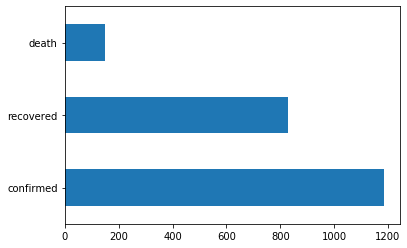

In [451]:
corona_virus['type'].value_counts().plot.barh();

In [452]:
import seaborn as sns

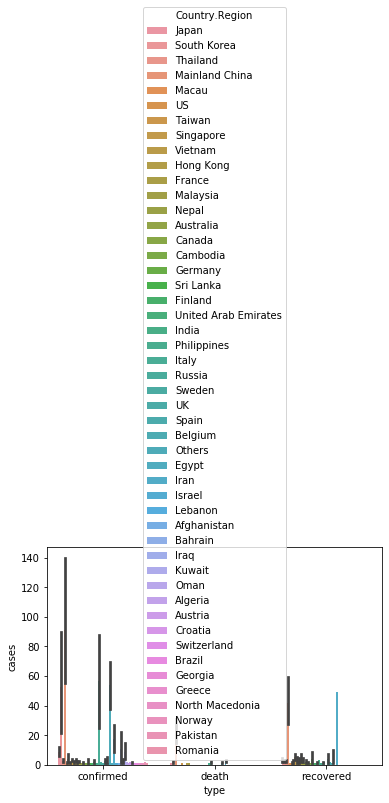

In [459]:
sns.barplot(x = "type", y = 'cases', hue ='Country.Region',data=corona_virus);

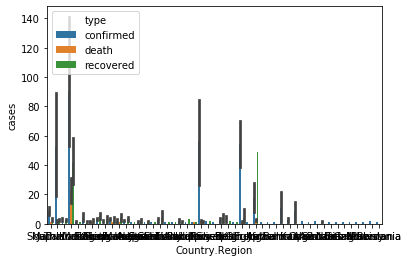

In [460]:
sns.barplot(x = 'Country.Region', y = 'cases', hue ='type',data=corona_virus);

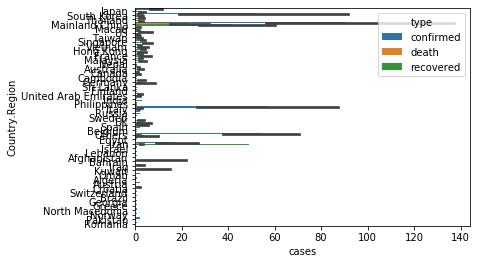

In [461]:
sns.barplot(x = 'cases', y = 'Country.Region', hue ='type',data=corona_virus);

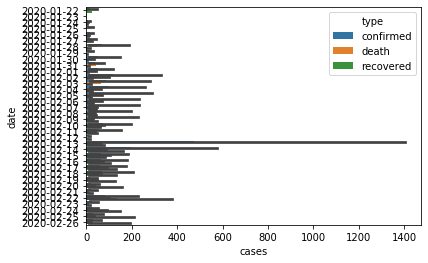

In [487]:
sns.barplot(x = 'cases', y = 'date', hue ='type',data=corona_virus);

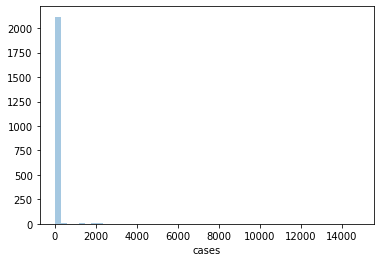

In [462]:
sns.distplot(corona_virus['cases'], kde = False); # anlamli sonuc vermiyor

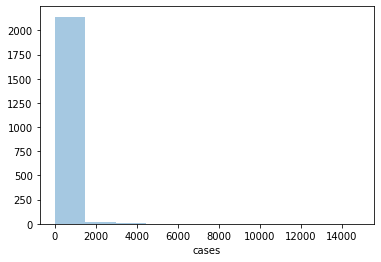

In [463]:
sns.distplot(corona_virus['cases'], bins = 10, kde = False);

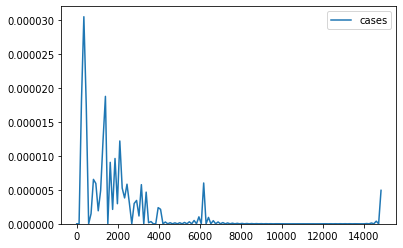

In [465]:
sns.kdeplot(corona_virus['cases']);

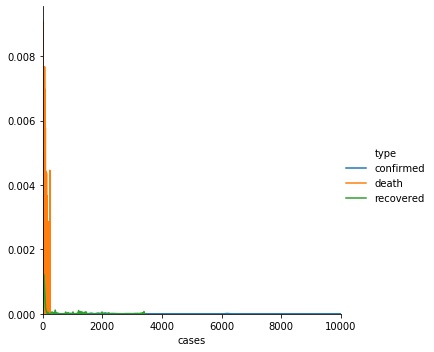

In [471]:
(sns
 .FacetGrid(corona_virus,hue = "type",
            height = 5,
            xlim = (0, 10000))
 .map(sns.kdeplot, "cases")
 .add_legend()
);

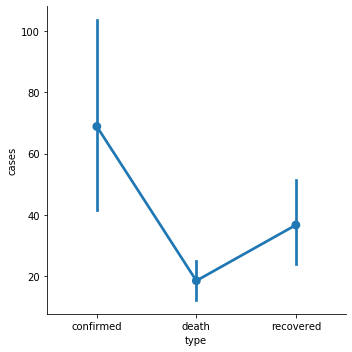

In [473]:
sns.catplot(x = "type", y = "cases", kind = "point", data = corona_virus);

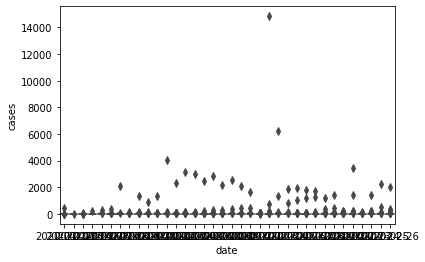

In [488]:
sns.boxplot(x = "date", y = "cases", data = corona_virus);

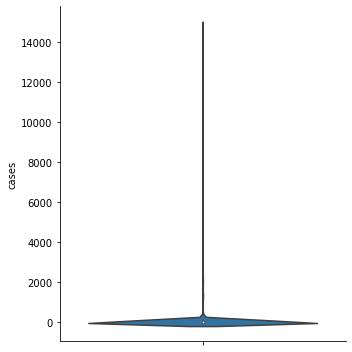

In [489]:
sns.catplot(y = "cases", kind = "violin", data = corona_virus);

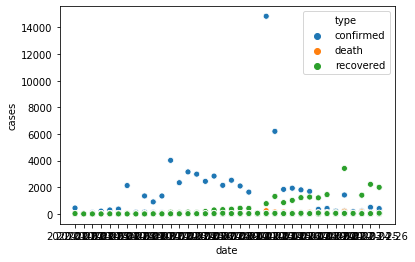

In [492]:
sns.scatterplot(x = "date", y = "cases", hue = 'type', data = corona_virus);

In [493]:
import matplotlib.pyplot as plt

C:\Users\tor23\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tor23\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


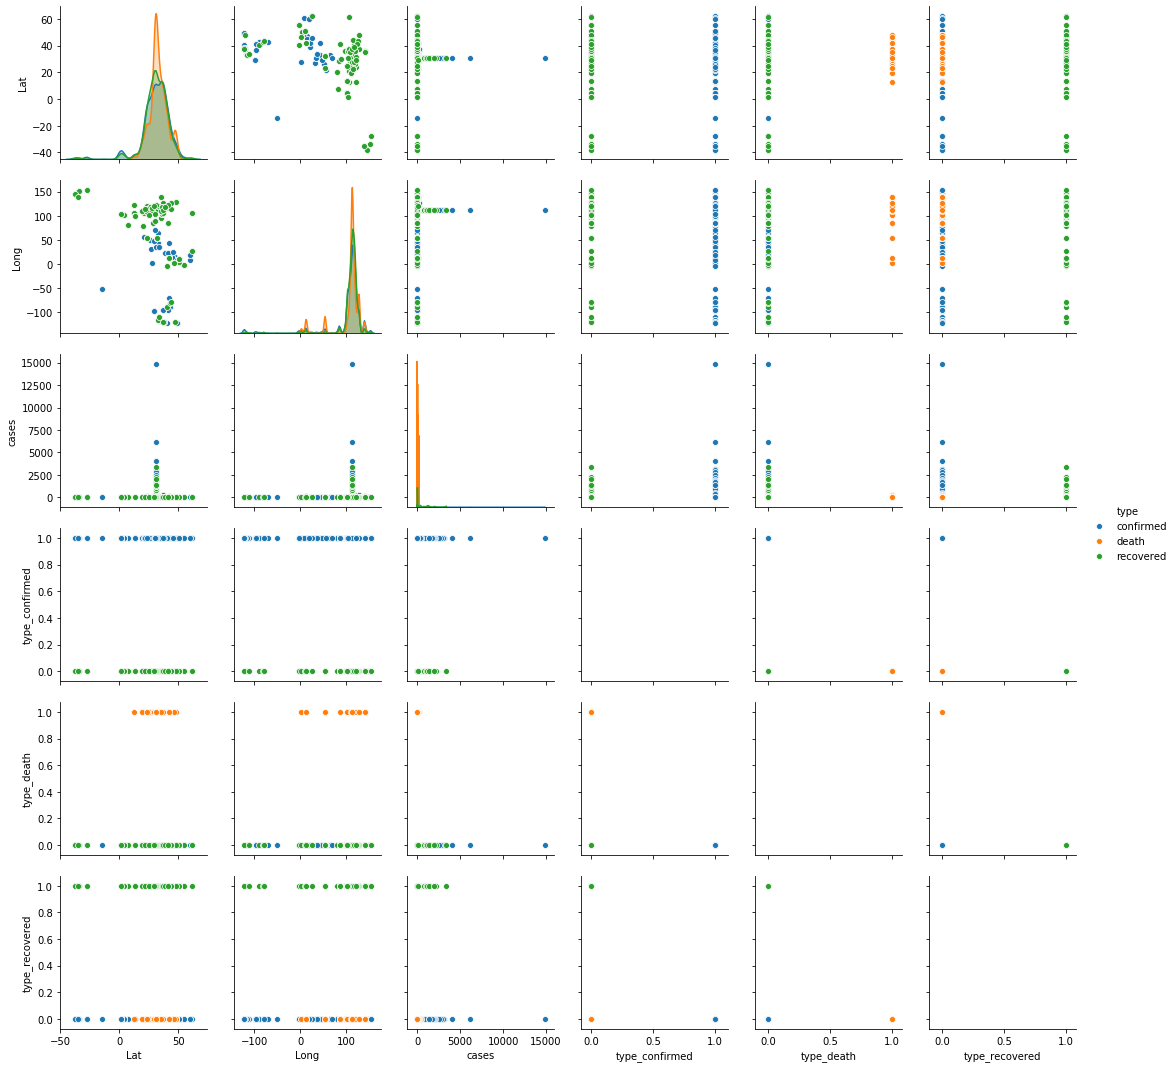

In [495]:
sns.pairplot(corona_virus, hue='type');

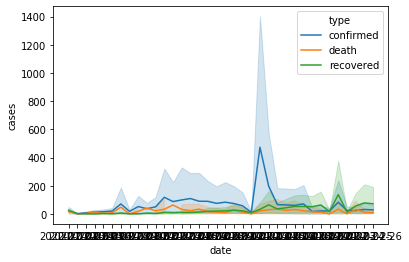

In [502]:
sns.lineplot(x = "date", y = "cases", hue = 'type', data = corona_virus);

In [556]:
import matplotlib.pyplot as plt

In [ ]:
plt.xticks()